# Project 1
### Problem statement
For this project you must create a data set by simulating a real-world phenomenon of
your choosing. You may pick any phenomenon you wish – you might pick one that is
of interest to you in your personal or professional life. Then, rather than collect data
related to the phenomenon, you should model and synthesise such data using Python.

I've decided to look at the stack overflow annual survey for 2023 results of which are available here https://survey.stackoverflow.co/2023/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import io
from urllib.request import urlopen
import re

Download Stack Overflow Annual survey 2023

In [2]:
r = urlopen('https://cdn.stackoverflow.co/files/jo7n4k8s/production/49915bfd46d0902c3564fd9a06b509d08a20488c.zip/stack-overflow-developer-survey-2023.zip').read()
file = ZipFile(io.BytesIO(r))
df = pd.read_csv(file.open('survey_results_public.csv'))

Let's get rid of the columns we are not interested in.

In [3]:
df = df.drop(list(df)[23:83], axis=1)
df = df.drop(['ResponseId', 'Q120', 'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'DevType', 'OrgSize', 
              'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country', 'Currency', 'CompTotal'], axis = 1 )

I am interested in only developers likely to be in the job market, so 25 to 64 year olds will be close enough.

In [4]:
df.drop(df.loc[df['Age']=='18-24 years old'].index, inplace=True)
df.drop(df.loc[df['Age']=='Under 18 years old'].index, inplace=True)
df.drop(df.loc[df['Age']=='65 years or older'].index, inplace=True)
df.drop(df.loc[df['Age']=='Prefer not to say'].index, inplace=True)

I'm interested in python when it comes to languages so we'll create a row fpr those who used Python in the past year

In [5]:

df["worked_with_python"] = df["LanguageHaveWorkedWith"]
df["worked_with_python"] = np.where(df["worked_with_python"].str.contains('Python'), 'Y',df["worked_with_python"])
chars_to_remove = ['Ada', 'Apex', 'APL', 'Assembly', 'Bash/Shell (all shells)', 'C', 'C#', 'C++', 'Clojure', 'Cobol', 'Crystal', 'Dart', 'Delphi', 
                   'Elixir', 'Erlang', 'F#', 'Flow', 'Fortran', 'GDScript', 'Go', 'Groovy', 'Haskell', 'HTML/CSS', 'Java', 'JavaScript', 'Julia', 
                   'Kotlin', 'Lisp', 'Lua', 'MATLAB', 'Nim', 'Objective-C', 'OCaml', 'Perl', 'PHP', 'PowerShell', 'Prolog', 'R', 'Raku', 'Ruby', 
                   'Rust', 'SAS', 'Scala', 'Solidity', 'SQL', 'Swift', 'TypeScript', 'VBA', 'Visual Basic (.Net)', 'Zig', ';']
regular_expression = '[' + re.escape (''. join (chars_to_remove)) + ']'
df["worked_with_python"] = df["worked_with_python"].str.replace(regular_expression, '', regex=True)
df["worked_with_python"] = df["worked_with_python"].replace(r'^\s*$', 'N', regex=True)


Let's do the same for those who want to work with python in the future

In [6]:
df["want_to_python"] = df["LanguageWantToWorkWith"]
df["want_to_python"] = np.where(df["want_to_python"].str.contains('Python'), 'Y',df["want_to_python"])
chars_to_remove = ['Ada', 'Apex', 'APL', 'Assembly', 'Bash/Shell (all shells)', 'C', 'C#', 'C++', 'Clojure', 'Cobol', 'Crystal', 'Dart', 'Delphi', 
                   'Elixir', 'Erlang', 'F#', 'Flow', 'Fortran', 'GDScript', 'Go', 'Groovy', 'Haskell', 'HTML/CSS', 'Java', 'JavaScript', 'Julia', 
                   'Kotlin', 'Lisp', 'Lua', 'MATLAB', 'Nim', 'Objective-C', 'OCaml', 'Perl', 'PHP', 'PowerShell', 'Prolog', 'R', 'Raku', 'Ruby', 
                   'Rust', 'SAS', 'Scala', 'Solidity', 'SQL', 'Swift', 'TypeScript', 'VBA', 'Visual Basic (.Net)', 'Zig', ';']
regular_expression = '[' + re.escape (''. join (chars_to_remove)) + ']'
df["want_to_python"] = df["want_to_python"].str.replace(regular_expression, '', regex=True)
df["want_to_python"] = df["want_to_python"].replace(r'^\s*$', 'N', regex=True)

Create a function to reuse this code

let's drop the old language columns

In [7]:
df = df.drop(['LanguageHaveWorkedWith', 'LanguageWantToWorkWith'], axis = 1 )
df.head(2)

,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,YearsCode,YearsCodePro,ConvertedCompYearly,worked_with_python,want_to_python
1,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,9,285000.0,Y,N
2,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,23,250000.0,N,N


graphs


N    35513
Y    29992
Name: worked_with_python, dtype: int64


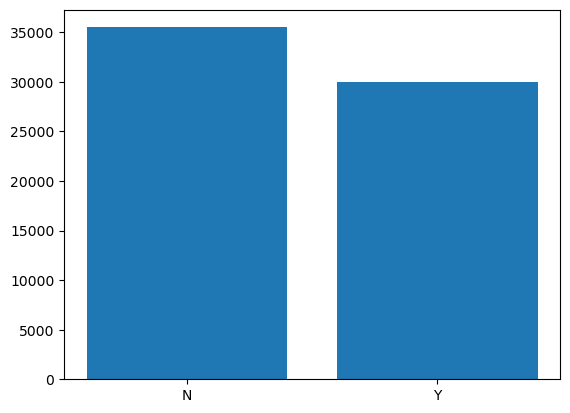

In [8]:
counts = df["worked_with_python"].value_counts()
print(counts)
unique = 'N', 'Y'
# we can now put this into a Bar Chart
plt.bar(unique, counts)
plt.show()

0    35725
1    29780
dtype: int64


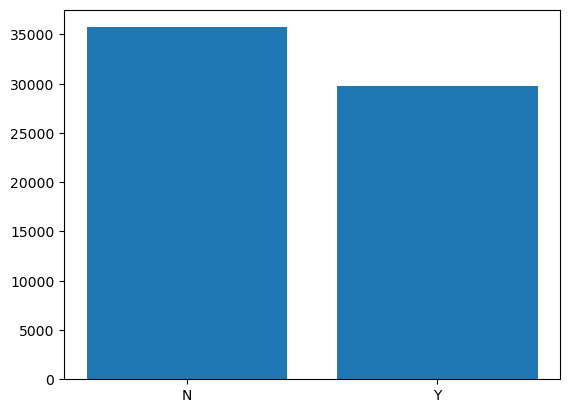

In [9]:
bn_list = pd.DataFrame(np.random.binomial(1, 0.4545, size = 65505))

counts = bn_list.value_counts()
unique = 'N', 'Y'
print(counts)
# we can now put this into a Bar Chart
plt.bar(unique, counts)
plt.show()

N    35297
Y    30208
Name: want_to_python, dtype: int64


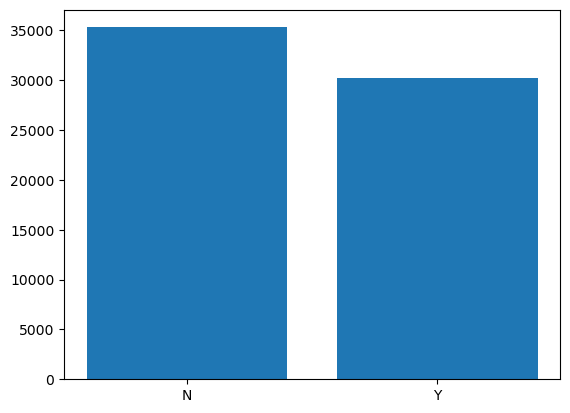

In [10]:
counts1 = df["want_to_python"].value_counts()
print(counts1)
unique = 'N', 'Y'
# we can now put this into a Bar Chart
plt.bar(unique, counts1)
plt.show()

0    35400
1    30105
dtype: int64


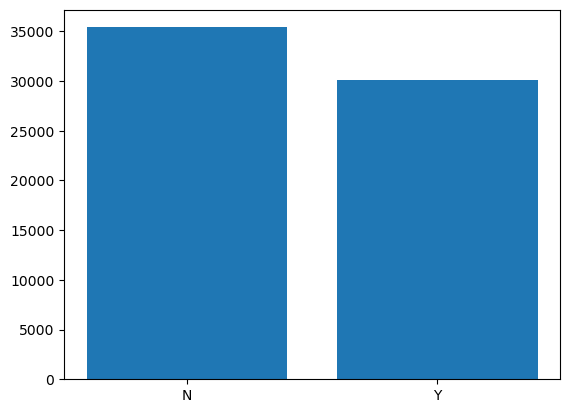

In [11]:
bn_list = pd.DataFrame(np.random.binomial(1, 0.457, size = 65505))

counts = bn_list.value_counts()
unique = 'N', 'Y'
print(counts)
# we can now put this into a Bar Chart
plt.bar(unique, counts)
plt.show()

In [12]:
counts = df["Age"].value_counts()
print(counts)

25-34 years old    33247
35-44 years old    20532
45-54 years old     8334
55-64 years old     3392
Name: Age, dtype: int64


25-34 years old    33247
35-44 years old    20532
45-54 years old     8334
55-64 years old     3392
Name: Age, dtype: int64


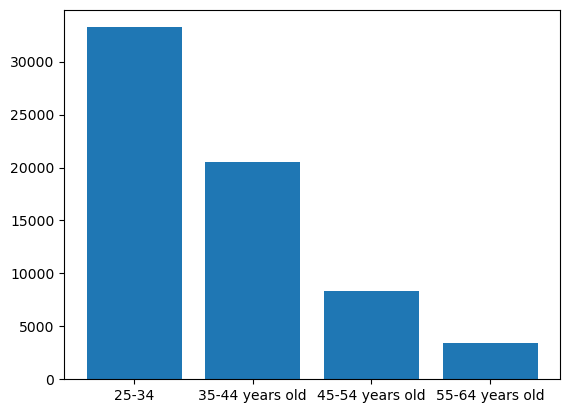

In [13]:
counts = df["Age"].value_counts()
unique = '25-34', '35-44 years old', '45-54 years old', '55-64 years old' 
print(counts)
# we can now put this into a Bar Chart
plt.bar(unique, counts)
plt.show()

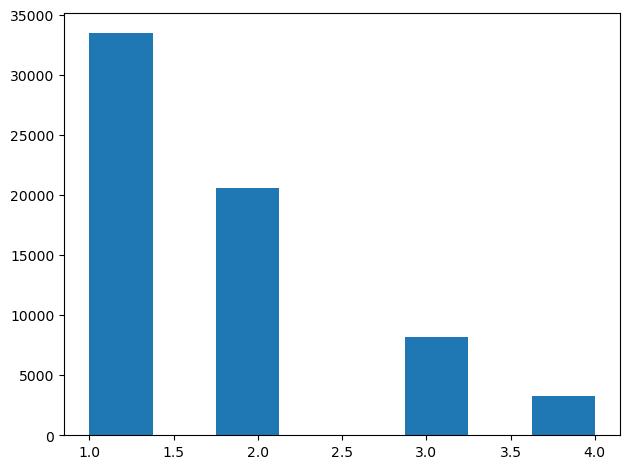

In [14]:


import random
s_list = []
for i in range(1,5):
        s_list.append(i)

r_list = random.choices(s_list, weights=(33247, 20532, 8334, 3392), k=65505)

plt.hist(r_list, bins = 8)
plt.tight_layout()
plt.show()


In [15]:
#YearsCode

df["YearsCode"] = np.where(df["YearsCode"].str.contains('NA'), '-1.0',df["YearsCode"])
df["YearsCode"] = np.where(df["YearsCode"].str.contains('Less than 1 year'), '0.0',df["YearsCode"])
df["YearsCode"] = np.where(df["YearsCode"].str.contains('More than 50 years'), '51.0',df["YearsCode"])
df["YearsCode"] = pd.to_numeric(df["YearsCode"], errors='coerce')
counts = df["YearsCode"].value_counts().rename_axis('unique_values').reset_index(name='counts')

counts = counts.sort_values(by=['unique_values'])
print(counts)


    unique_values  counts
23           -1.0    1016
34            0.0     422
31            1.0     490
25            2.0     879
18            3.0    1382
16            4.0    1540
9             5.0    2265
12            6.0    2153
5             7.0    2718
3             8.0    3210
8             9.0    2296
0            10.0    5326
11           11.0    2157
4            12.0    3164
7            13.0    2465
10           14.0    2199
1            15.0    4266
14           16.0    1814
17           17.0    1529
15           18.0    1686
26           19.0     824
2            20.0    3983
27           21.0     757
20           22.0    1203
19           23.0    1320
24           24.0     952
6            25.0    2659
29           26.0     702
30           27.0     700
28           28.0     711
37           29.0     321
13           30.0    2007
42           31.0     269
33           32.0     439
32           33.0     480
38           34.0     320
22           35.0    1080
40          

53


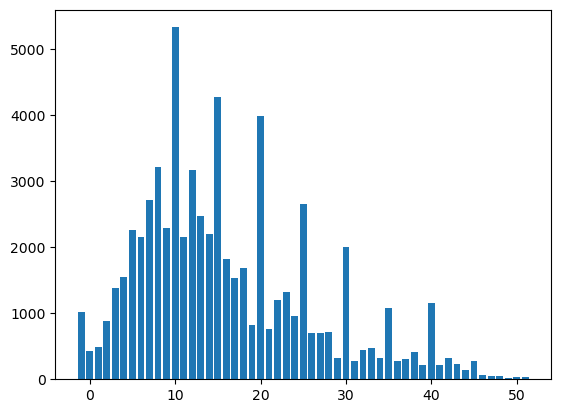

In [16]:
unique = counts['unique_values']
count1 = counts['counts']
print(len(count1))
plt.bar(unique, count1)
plt.show()

### Research mental rounding errors in surveys
Over a decade ago, Dominitz and Manski (1997) observed that respondents tend to report values at one-percent intervals at the extremes (i.e., 0, 1, 2 and 98, 99, 100) and at five-percent intervals elsewhere (i.e., 5, 10, …, 90, 95), with responses more bunched at 50 percent than at adjacent round values (40, 45, 55, 60). This finding has been corroborated repeatedly in subsequent studies. It seems evident that respondents to subjective probability statements round their responses, but to what extent? When someone states “3 percent,” one might reasonably infer that the person is rounding to the nearest one percent. However, when someone states “30 percent,” one might well be uncertain whether the person is rounding to the nearest one, five, or ten percent. Even more uncertain is how to interpret responses of 0, 50, and 100 percent. In some cases, these may be sharp expressions of beliefs, rounded only to the nearest one or five percent. However, some respondents may engage in gross rounding, using 0 to express any relatively small chance of an event, 50 to represent any intermediate chance, and 100 for any relatively large chance. (Manski and Molinari, 2010)

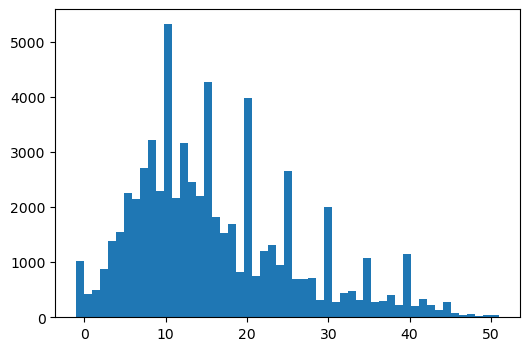

In [17]:
fig, ax = plt.subplots(figsize = (6,4))
plt.hist(df["YearsCode"], bins = 53)
plt.show()

[1016, 422, 490, 879, 1382, 1540, 2265, 2153, 2718, 3210, 2296, 5326, 2157, 3164, 2465, 2199, 4266, 1814, 1529, 1686, 824, 3983, 757, 1203, 1320, 952, 2659, 702, 700, 711, 321, 2007, 269, 439, 480, 320, 1080, 277, 304, 412, 221, 1148, 211, 323, 229, 140, 275, 70, 47, 53, 21, 35, 35]


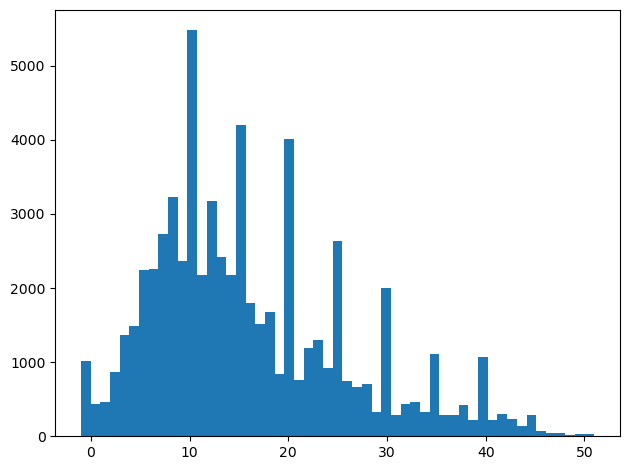

In [18]:
weighting = counts['counts'].tolist()
print(weighting)

import random
s_list = []
for i in range(-1,52):
        s_list.append(i)

r_list = random.choices(s_list, weights=(weighting), k=65505)

plt.hist(r_list, bins = 53)
plt.tight_layout()
plt.show()

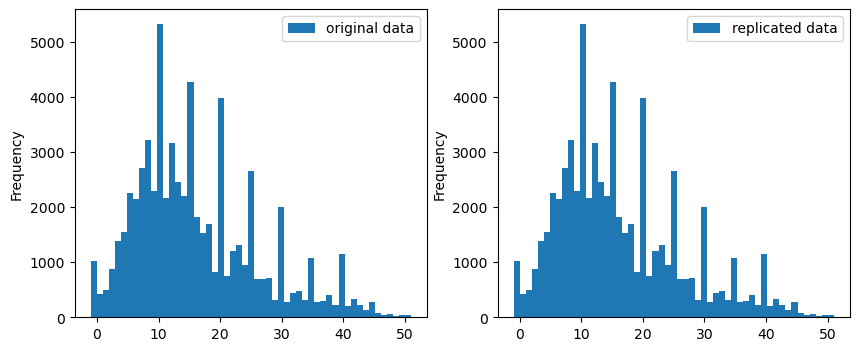

In [19]:
d = {'col1':df["YearsCode"]}
df1 = pd.DataFrame(d)
fig, ((ax, ax1)) = plt.subplots(ncols=2, nrows=1,  figsize=(10, 4))

df.plot(kind = 'hist', y = "YearsCode", label = 'original data',bins = 53, ax=ax)
df1.plot(kind = 'hist', y = "col1", label = 'replicated data',bins = 53, ax=ax1)
plt.show()

In [20]:
#EdLevel
count2 = df["EdLevel"].value_counts()
print(count2)

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          28930
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       19005
Some college/university study without earning a degree                                 7713
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         3524
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     2479
Associate degree (A.A., A.S., etc.)                                                    2038
Something else                                                                          761
Primary/elementary school                                                               363
Name: EdLevel, dtype: int64


In [21]:
unique = 'l 8', 'l 9', 'some 3 l', 'l 10' , '2nd l', 'l 7', 'other', 'primary'
# we can now put this into a Bar Chart
#plt.bar(unique, count2)
print(count2)
#plt.show()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          28930
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       19005
Some college/university study without earning a degree                                 7713
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         3524
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     2479
Associate degree (A.A., A.S., etc.)                                                    2038
Something else                                                                          761
Primary/elementary school                                                               363
Name: EdLevel, dtype: int64


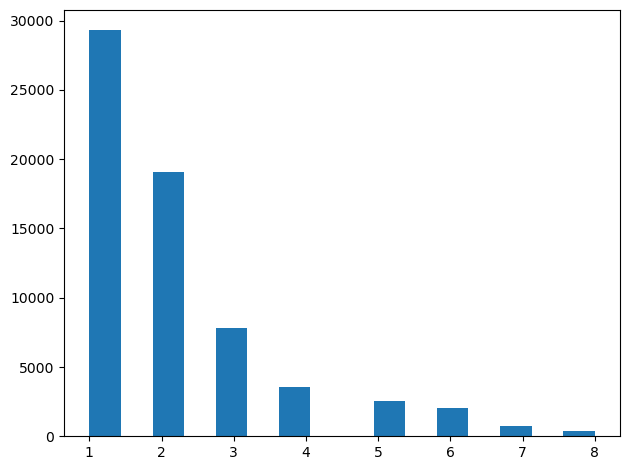

In [22]:
import random
s_list = []
for i in range(1,9):
        s_list.append(i)

r_list = random.choices(s_list, weights=(28930, 19005, 7713, 3524, 2479, 2038, 761, 363), k=65505)

plt.hist(r_list, bins = 16)
plt.tight_layout()
plt.show()

In [23]:
#MainBranch
count2 = df["MainBranch"].value_counts()
print(count2)

I am a developer by profession                                                           55088
I am not primarily a developer, but I write code sometimes as part of my work/studies     5943
I used to be a developer by profession, but no longer am                                  1571
I am learning to code                                                                     1285
I code primarily as a hobby                                                                926
None of these                                                                              692
Name: MainBranch, dtype: int64


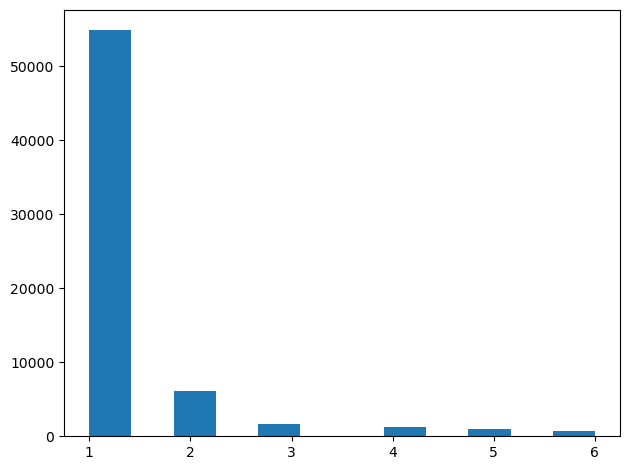

In [24]:
s_list = []
for i in range(1,7):
        s_list.append(i)

r_list = random.choices(s_list, weights=(55088, 5943, 1571, 1285, 926, 692), k=65505)

plt.hist(r_list, bins = 12)
plt.tight_layout()
plt.show()

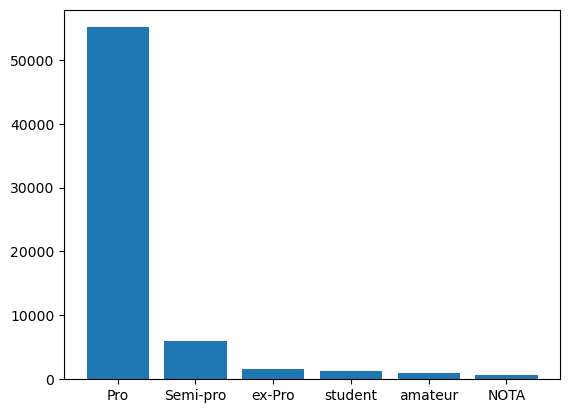

In [25]:
unique = 'Pro', 'Semi-pro', 'ex-Pro', 'student' , 'amateur', 'NOTA'
# we can now put this into a Bar Chart
plt.bar(unique, count2)
plt.show()

In [26]:
#RemoteWork
count2 = df["RemoteWork"].value_counts()
print(count2)

Remote                                  26362
Hybrid (some remote, some in-person)    26223
In-person                                8966
Name: RemoteWork, dtype: int64


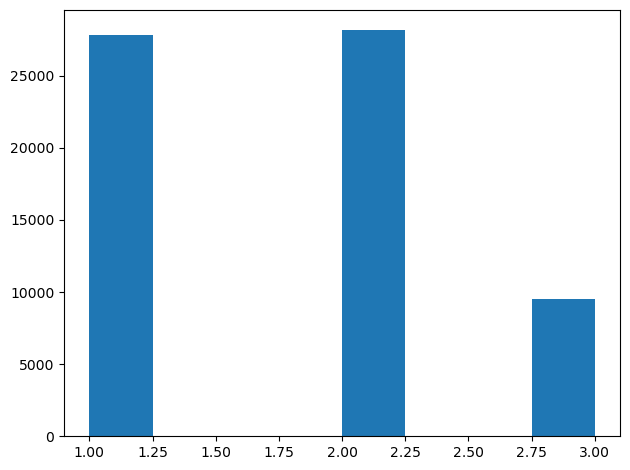

In [27]:
s_list = []
for i in range(1,4):
        s_list.append(i)

r_list = random.choices(s_list, weights=(26362, 26223, 8966,), k=65505)

plt.hist(r_list, bins = 8)
plt.tight_layout()
plt.show()

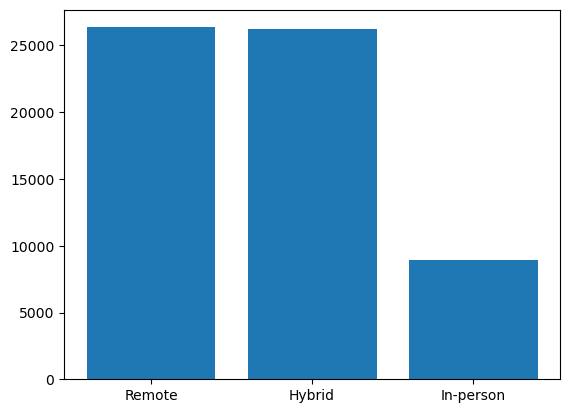

In [28]:
unique = 'Remote', 'Hybrid', 'In-person'
# we can now put this into a Bar Chart
plt.bar(unique, count2)
plt.show()